In [1]:
!kaggle datasets download -d anshulmehtakaggl/themassiveindianfooddataset

Dataset URL: https://www.kaggle.com/datasets/anshulmehtakaggl/themassiveindianfooddataset
License(s): CC0-1.0
 99% 721M/726M [00:28<00:00, 28.2MB/s]
100% 726M/726M [00:28<00:00, 26.9MB/s]


In [2]:
import zipfile
zip_ref = zipfile.ZipFile('/content/themassiveindianfooddataset.zip', 'r')
zip_ref.extractall()
zip_ref.close()

In [3]:
import os
for dirpath,dirnames,filenames in os.walk("/content/"):
    print(f"There are {len(dirnames)} Directories and {len(filenames)} Files in '{dirpath}'")

There are 17 Directories and 1 Files in '/content/'
There are 2 Directories and 7 Files in '/content/.config'
There are 0 Directories and 1 Files in '/content/.config/configurations'
There are 1 Directories and 0 Files in '/content/.config/logs'
There are 0 Directories and 6 Files in '/content/.config/logs/2024.07.10'
There are 1 Directories and 0 Files in '/content/Vadapav-Resized'
There are 0 Directories and 536 Files in '/content/Vadapav-Resized/Vadapav-Resized'
There are 1 Directories and 0 Files in '/content/Chole-Bhature-Resized'
There are 0 Directories and 326 Files in '/content/Chole-Bhature-Resized/Chole-Bhature-Resized'
There are 1 Directories and 0 Files in '/content/dhokla-resize'
There are 0 Directories and 248 Files in '/content/dhokla-resize/dhokla-resize'
There are 1 Directories and 0 Files in '/content/Naan-Resized'
There are 0 Directories and 353 Files in '/content/Naan-Resized/Naan-Resized'
There are 1 Directories and 0 Files in '/content/dal_resized'
There are 0 Dir

In [4]:
class_name=[]
#data is not named properly so
resize='size'
resized='sized'

In [5]:
class_name=[]
for file in os.listdir('/content/'):
  if file.endswith(resize):
    class_name.append(file)
  elif file.endswith(resized):
    class_name.append(file)

In [6]:
class_name

['Vadapav-Resized',
 'Chole-Bhature-Resized',
 'dhokla-resize',
 'Naan-Resized',
 'dal_resized',
 'pakora-resize',
 'dabeli-resize',
 'Pav-Bhaji-Resized',
 'Biryani-resize',
 'kathi-resize',
 'dosa_resized',
 'Pani-Puri-resize',
 'Jalebi-Resize',
 'Paneer-Tikka-resized',
 'Kofta-Resized']

In [7]:
os.listdir('/content/Pani-Puri-resize')

['resize']

In [8]:
def copy_images(parent_folder, target_labels,train_ratio=0.7):
    image_paths = []
    for label in target_labels:
      if label not in ['Pani-Puri-resize', 'Biryani-resize']:
        target_dir = os.path.join('Indian_Food_Dataset', "train", label)
        test_dir = os.path.join('Indian_Food_Dataset', "test", label)
        os.makedirs(target_dir, exist_ok=True)
        os.makedirs(test_dir, exist_ok=True)
        image_path = [os.path.join(parent_folder, label,label,image)
                       for image in os.listdir(os.path.join(parent_folder,label,label))]
        split_point = int(len(image_path) * train_ratio)
      elif label == 'Pani-Puri-resize':

        label = 'Pani-Puri-resize'
        target_dir = os.path.join('Indian_Food_Dataset', "train", label)
        test_dir = os.path.join('Indian_Food_Dataset', "test", label)
        test_dir = os.path.join('Indian_Food_Dataset', "test", label)
        os.makedirs(target_dir, exist_ok=True)
        os.makedirs(test_dir, exist_ok=True)
        image_path = [os.path.join(parent_folder, label,"resize",image)
                       for image in os.listdir(os.path.join(parent_folder,label,"resize"))]
        split_point = int(len(image_path) * train_ratio)
      elif label == 'Biryani-resize':
        label = 'Biryani-resize'
        target_dir = os.path.join('Indian_Food_Dataset', "train", label)
        test_dir = os.path.join('Indian_Food_Dataset', "test", label)
        os.makedirs(target_dir, exist_ok=True)
        os.makedirs(test_dir, exist_ok=True)
        image_path = [os.path.join(parent_folder, label,"resize",image)
                       for image in os.listdir(os.path.join(parent_folder,label,"resize"))]
        split_point = int(len(image_path) * train_ratio)


      for i, image_path in enumerate(image_path):
          if i < split_point:
            new_path = os.path.join(target_dir, os.path.basename(image_path))
            os.rename(image_path, new_path)
          else:
            new_path = os.path.join(test_dir, os.path.basename(image_path))
            os.rename(image_path, new_path)

In [9]:
copy_images('/content/',class_name)

In [10]:
for dirpath,dirnames,filenames in os.walk("/content/Indian_Food_Dataset"):
  print(f"There are {len(dirnames)} Directories and {len(filenames)} Files in '{dirpath}'")

There are 2 Directories and 0 Files in '/content/Indian_Food_Dataset'
There are 15 Directories and 0 Files in '/content/Indian_Food_Dataset/test'
There are 0 Directories and 161 Files in '/content/Indian_Food_Dataset/test/Vadapav-Resized'
There are 0 Directories and 98 Files in '/content/Indian_Food_Dataset/test/Chole-Bhature-Resized'
There are 0 Directories and 75 Files in '/content/Indian_Food_Dataset/test/dhokla-resize'
There are 0 Directories and 106 Files in '/content/Indian_Food_Dataset/test/Naan-Resized'
There are 0 Directories and 79 Files in '/content/Indian_Food_Dataset/test/dal_resized'
There are 0 Directories and 114 Files in '/content/Indian_Food_Dataset/test/pakora-resize'
There are 0 Directories and 66 Files in '/content/Indian_Food_Dataset/test/dabeli-resize'
There are 0 Directories and 91 Files in '/content/Indian_Food_Dataset/test/Pav-Bhaji-Resized'
There are 0 Directories and 69 Files in '/content/Indian_Food_Dataset/test/Biryani-resize'
There are 0 Directories and 1

In [11]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

tf.random.set_seed(42)

train_data_gen=ImageDataGenerator(rescale=1/255)
test_data_gen=ImageDataGenerator(rescale=1/255)

# Set up train and test directory
train_dir = "/content/Indian_Food_Dataset/train"
test_dir = "/content/Indian_Food_Dataset/test"

# Import data from directories and turn it into batches
train_data= train_data_gen.flow_from_directory(train_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="categorical",
                                               seed=42)
test_data= test_data_gen.flow_from_directory(test_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="categorical",
                                               seed=42)

Found 3331 images belonging to 15 classes.
Found 1439 images belonging to 15 classes.


In [12]:
import datetime

def create_tensorboard_callback(dir_name, experiment_name):
  log_dir = dir_name + "/" + experiment_name + "/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
  tensorboard_callback = tf.keras.callbacks.TensorBoard(
      log_dir=log_dir
  )
  print(f"Saving TensorBoard log files to: {log_dir}")
  return tensorboard_callback

In [13]:
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow.keras import layers

In [14]:
# Resnet 50 V2 feature vector
resnet_url = "https://tfhub.dev/google/imagenet/resnet_v2_50/feature_vector/4"

# EfficientNetB0 feature vector
efficientnet_url = "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet1k_b0/feature_vector/2"

## Building and Training the Model


In [15]:
base_model=tf.keras.applications.ResNet50(include_top=False)
base_model.trainable=False

inputs=tf.keras.layers.Input(shape=(224,224,3),name="input_layer")
x=base_model(inputs,training=False)
print(f"Shape after base_model: {x.shape}")

x = tf.keras.layers.GlobalAveragePooling2D(name="global_average_pooling_layer")(x)
print(f"After GlobalAveragePooling2D(): {x.shape}")

output=tf.keras.layers.Dense(15,activation="softmax")(x)
model_0=tf.keras.Model(inputs,output)

# Compile the model
model_0.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Train the model
history1=model_0.fit(train_data,
                    epochs=5,
                    steps_per_epoch=len(train_data),
                    validation_data=test_data,
                    validation_steps=int(0.25*len(test_data)),
                    callbacks=[create_tensorboard_callback("indianfood101","efficientnet_model_0")])

94765736/94765736 [==============================] - 3s 0us/step
Shape after base_model: (None, 7, 7, 2048)
After GlobalAveragePooling2D(): (None, 2048)
Saving TensorBoard log files to: indianfood101/efficientnet_model_0/20240711-190319
Epoch 1/5
 13/105 [==>...........................] - ETA: 14s - loss: 2.8331 - accuracy: 0.0769

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


105/105 [==============================] - 31s 222ms/step - loss: 2.6658 - accuracy: 0.1324 - val_loss: 2.5677 - val_accuracy: 0.1648
Epoch 2/5
105/105 [==============================] - 25s 236ms/step - loss: 2.5726 - accuracy: 0.1564 - val_loss: 2.6091 - val_accuracy: 0.1307
Epoch 3/5
105/105 [==============================] - 22s 208ms/step - loss: 2.5245 - accuracy: 0.1672 - val_loss: 2.5391 - val_accuracy: 0.1506
Epoch 4/5
105/105 [==============================] - 23s 216ms/step - loss: 2.4806 - accuracy: 0.1804 - val_loss: 2.5454 - val_accuracy: 0.1761
Epoch 5/5
105/105 [==============================] - 22s 210ms/step - loss: 2.4590 - accuracy: 0.1921 - val_loss: 2.4898 - val_accuracy: 0.1761


In [16]:
import matplotlib.pyplot as plt

def plot_loss_curves(history):
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();

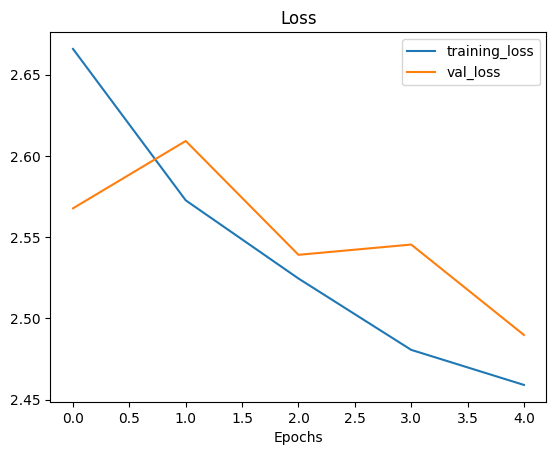

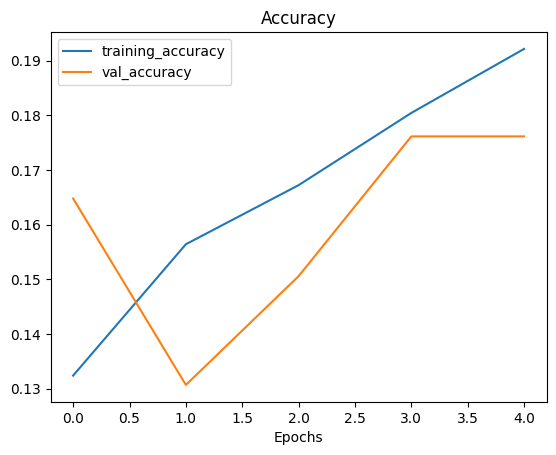

In [17]:
plot_loss_curves(history1)

In [18]:
model_0.evaluate(test_data)

45/45 [==============================] - 11s 242ms/step - loss: 2.4801 - accuracy: 0.2092


[2.480069637298584, 0.2091730386018753]

In [19]:
train_data= tf.keras.preprocessing.image_dataset_from_directory(train_dir,
                                               batch_size=32,
                                               image_size=(224, 224),
                                               label_mode="categorical",
                                               seed=42)

test_data= tf.keras.preprocessing.image_dataset_from_directory(test_dir,
                                               batch_size=32,
                                               image_size=(224, 224),
                                               label_mode="categorical",
                                               seed=42)

Found 3331 files belonging to 15 classes.
Found 1439 files belonging to 15 classes.


In [20]:
base_model=tf.keras.applications.EfficientNetB0(include_top=False)
base_model.trainable=False

inputs=tf.keras.layers.Input(shape=(224,224,3),name="input_layer")
x=base_model(inputs,training=False)
print(f"Shape after base_model: {x.shape}")

x = tf.keras.layers.GlobalAveragePooling2D(name="global_average_pooling_layer")(x)
print(f"After GlobalAveragePooling2D(): {x.shape}")

output=tf.keras.layers.Dense(15,activation="softmax")(x)
model_1=tf.keras.Model(inputs,output)

16705208/16705208 [==============================] - 1s 0us/step
Shape after base_model: (None, 7, 7, 1280)
After GlobalAveragePooling2D(): (None, 1280)


In [21]:
# Compile the model
model_1.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Train the model
history2=model_1.fit(train_data,
                    epochs=5,
                    steps_per_epoch=len(train_data),
                    validation_data=test_data,
                    validation_steps=int(0.25*len(test_data)),
                    callbacks=[create_tensorboard_callback("food101","efficientnet_model_1")])

Saving TensorBoard log files to: food101/efficientnet_model_1/20240711-190643
Epoch 1/5
105/105 [==============================] - 30s 188ms/step - loss: 1.3302 - accuracy: 0.6575 - val_loss: 0.7342 - val_accuracy: 0.8153
Epoch 2/5
105/105 [==============================] - 17s 153ms/step - loss: 0.5210 - accuracy: 0.8955 - val_loss: 0.4963 - val_accuracy: 0.8722
Epoch 3/5
105/105 [==============================] - 15s 140ms/step - loss: 0.3588 - accuracy: 0.9316 - val_loss: 0.4339 - val_accuracy: 0.8750
Epoch 4/5
105/105 [==============================] - 16s 140ms/step - loss: 0.2789 - accuracy: 0.9490 - val_loss: 0.4069 - val_accuracy: 0.8892
Epoch 5/5
105/105 [==============================] - 15s 140ms/step - loss: 0.2262 - accuracy: 0.9595 - val_loss: 0.3601 - val_accuracy: 0.8920


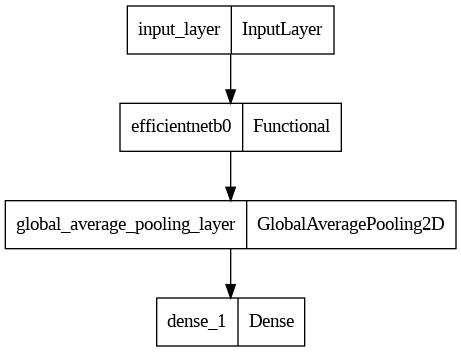

In [22]:
tf.keras.utils.plot_model(model_1)

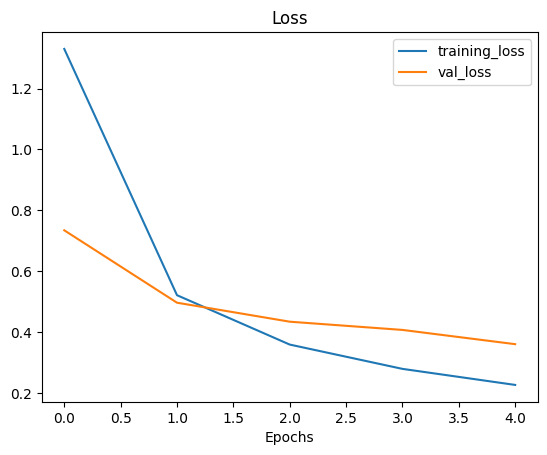

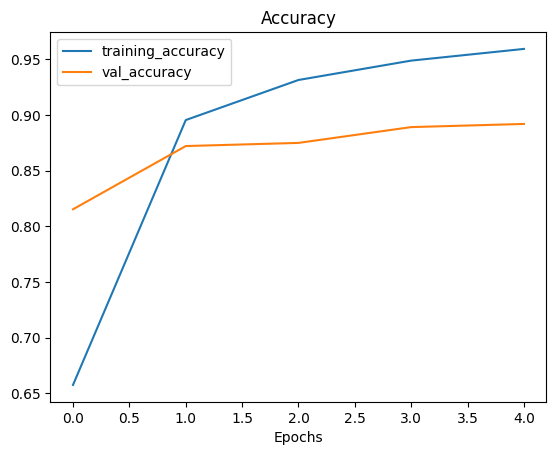

In [23]:
plot_loss_curves(history2)

In [24]:
from tensorflow import keras
from tensorflow.keras import layers
# from tensorflow.keras.layers.experimental import preprocessing

data_augmentation = keras.Sequential([
  layers.RandomFlip("horizontal"),
  layers.RandomRotation(0.2),
  layers.RandomZoom(0.2),
  layers.RandomHeight(0.2),
  layers.RandomWidth(0.2),
  # preprocessing.Rescaling(1./255) # keep for ResNet50V2, remove for EfficientNetV2B0
], name ="data_augmentation")

In [25]:
import matplotlib.pyplot as plt

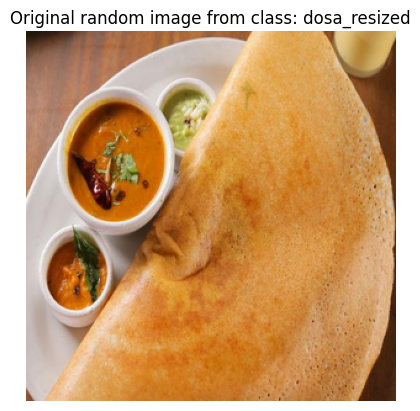

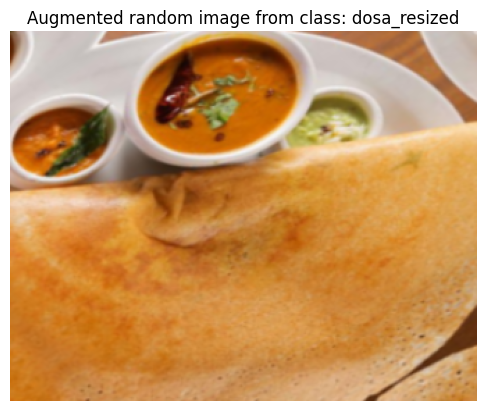

In [26]:
import random
import matplotlib.image as mpimg
target_class = random.choice(train_data.class_names)
target_dir = "/content/Indian_Food_Dataset/train/" + target_class
random_image = random.choice(os.listdir(target_dir))
random_image_path = target_dir + "/" + random_image

img = mpimg.imread(random_image_path)
plt.imshow(img)
plt.title(f"Original random image from class: {target_class}")
plt.axis(False);

# Augment the image
augmented_img = data_augmentation(tf.expand_dims(img, axis=0))
plt.figure()
plt.imshow(tf.squeeze(augmented_img))
plt.title(f"Augmented random image from class: {target_class}")
plt.axis(False);

In [27]:
input_shape = (224, 224, 3)
base_model = tf.keras.applications.efficientnet_v2.EfficientNetV2B0(include_top=False)
base_model.trainable = False
inputs = layers.Input(shape=input_shape, name="input_layer")

x = data_augmentation(inputs)
x = base_model(x, training=False)
x = layers.GlobalAveragePooling2D(name="global_average_pooling_layer")(x)

outputs = layers.Dense(15, activation="softmax", name="output_layer")(x)
model_2 = keras.Model(inputs, outputs)

24274472/24274472 [==============================] - 1s 0us/step


In [28]:
# Compile the model
model_2.compile(loss="categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit the model
history_3= model_2.fit(train_data,
                    epochs=5,
                    steps_per_epoch=len(train_data),
                    validation_data=test_data,
                    validation_steps=int(0.25* len(test_data)),
                    callbacks=[create_tensorboard_callback("food101","resnet_model2")])

Saving TensorBoard log files to: food101/resnet_model2/20240711-190830
Epoch 1/5
105/105 [==============================] - 115s 1s/step - loss: 1.6356 - accuracy: 0.5470 - val_loss: 0.9330 - val_accuracy: 0.7898
Epoch 2/5
105/105 [==============================] - 72s 679ms/step - loss: 0.8431 - accuracy: 0.7875 - val_loss: 0.6133 - val_accuracy: 0.8608
Epoch 3/5
105/105 [==============================] - 69s 645ms/step - loss: 0.6427 - accuracy: 0.8367 - val_loss: 0.4949 - val_accuracy: 0.8750
Epoch 4/5
105/105 [==============================] - 65s 614ms/step - loss: 0.5488 - accuracy: 0.8553 - val_loss: 0.4687 - val_accuracy: 0.8807
Epoch 5/5
105/105 [==============================] - 52s 488ms/step - loss: 0.4706 - accuracy: 0.8796 - val_loss: 0.4233 - val_accuracy: 0.8807


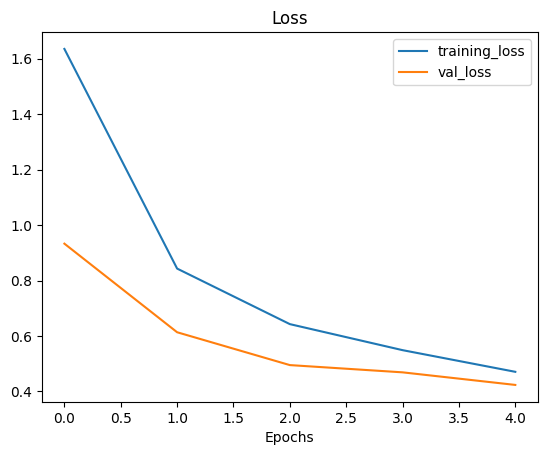

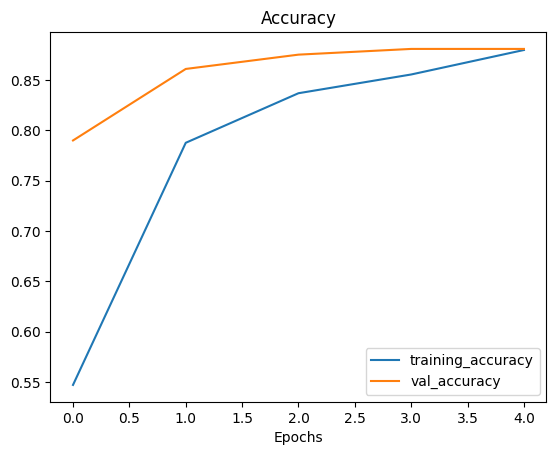

In [29]:
plot_loss_curves(history_3)

In [30]:
model_2.evaluate(test_data)

45/45 [==============================] - 7s 130ms/step - loss: 0.3773 - accuracy: 0.8930


[0.3772769570350647, 0.892981231212616]

In [31]:
checkpoint_path = "ten_percent_model_checkpoints_weights/checkpoint.ckpt"

# Create a ModelCheckpoint callback that saves the model's weights only
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                         save_weights_only=True,
                                                         save_best_only=True,
                                                         save_freq="epoch",
                                                         verbose=1)

In [32]:
def create_base_model(input_shape: tuple[int, int, int] = (224, 224, 3),
                      output_shape: int = 10,
                      learning_rate: float = 0.001,
                      training: bool = False) -> tf.keras.Model:

    # Create base model
    base_model = tf.keras.applications.efficientnet_v2.EfficientNetV2B0(include_top=False)
    base_model.trainable = training

    # Setup model input and outputs with data augmentation built-in
    inputs = layers.Input(shape=input_shape, name="input_layer")
    x = data_augmentation(inputs)
    x = base_model(x, training=False)  # pass augmented images to base model but keep it in inference mode
    x = layers.GlobalAveragePooling2D(name="global_average_pooling_layer")(x)
    outputs = layers.Dense(units=15, activation="softmax", name="output_layer")(x)
    model = tf.keras.Model(inputs, outputs)

    # Compile the model
    model.compile(loss="categorical_crossentropy",
                  optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
                  metrics=["accuracy"])
    return model

model_3 = create_base_model()

In [33]:
# Fit the model saving checkpoints every epoch
initial_epochs = 5
history_10_percent_data_aug = model_3.fit(train_data,
                                          epochs=initial_epochs,
                                          validation_data=test_data,
                                          validation_steps=int(0.25 * len(test_data)),
                                          callbacks=[create_tensorboard_callback("food101", "efficientnet_model_3"),
                                                     checkpoint_callback])

Saving TensorBoard log files to: food101/efficientnet_model_3/20240711-191624
Epoch 1/5
105/105 [==============================] - ETA: 0s - loss: 1.6084 - accuracy: 0.5581
Epoch 1: val_loss improved from inf to 0.93836, saving model to ten_percent_model_checkpoints_weights/checkpoint.ckpt
105/105 [==============================] - 65s 537ms/step - loss: 1.6084 - accuracy: 0.5581 - val_loss: 0.9384 - val_accuracy: 0.7443
Epoch 2/5
105/105 [==============================] - ETA: 0s - loss: 0.8530 - accuracy: 0.7905
Epoch 2: val_loss improved from 0.93836 to 0.63041, saving model to ten_percent_model_checkpoints_weights/checkpoint.ckpt
105/105 [==============================] - 50s 474ms/step - loss: 0.8530 - accuracy: 0.7905 - val_loss: 0.6304 - val_accuracy: 0.8324
Epoch 3/5
105/105 [==============================] - ETA: 0s - loss: 0.6355 - accuracy: 0.8430
Epoch 3: val_loss improved from 0.63041 to 0.52885, saving model to ten_percent_model_checkpoints_weights/checkpoint.ckpt
105/105

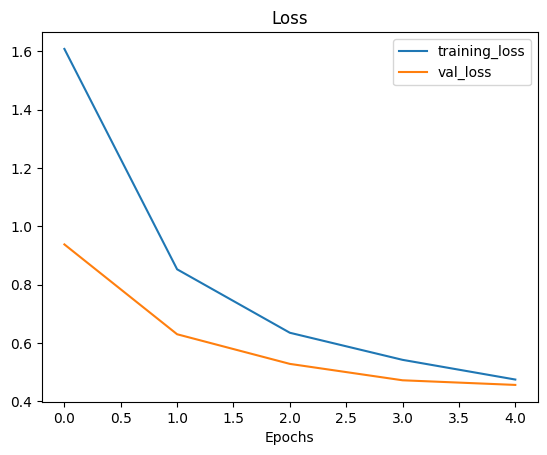

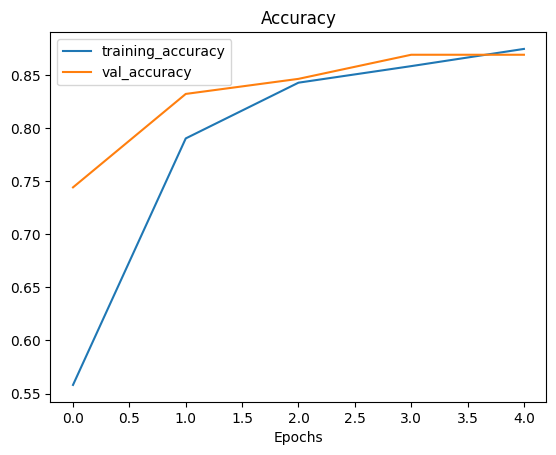

In [34]:
plot_loss_curves(history_10_percent_data_aug)

In [35]:
model_3.evaluate(test_data)

45/45 [==============================] - 7s 131ms/step - loss: 0.3790 - accuracy: 0.8937


[0.3789854347705841, 0.8936761617660522]

In [36]:
model_3.layers

In [37]:
model_3_baselayer=model_3.layers[2]
model_3_baselayer


In [38]:
for layer_number, layer in enumerate(model_3_baselayer.layers):
  print(layer_number, layer.name, layer.trainable)

0 input_4 False
1 rescaling_3 False
2 normalization_2 False
3 stem_conv False
4 stem_bn False
5 stem_activation False
6 block1a_project_conv False
7 block1a_project_bn False
8 block1a_project_activation False
9 block2a_expand_conv False
10 block2a_expand_bn False
11 block2a_expand_activation False
12 block2a_project_conv False
13 block2a_project_bn False
14 block2b_expand_conv False
15 block2b_expand_bn False
16 block2b_expand_activation False
17 block2b_project_conv False
18 block2b_project_bn False
19 block2b_drop False
20 block2b_add False
21 block3a_expand_conv False
22 block3a_expand_bn False
23 block3a_expand_activation False
24 block3a_project_conv False
25 block3a_project_bn False
26 block3b_expand_conv False
27 block3b_expand_bn False
28 block3b_expand_activation False
29 block3b_project_conv False
30 block3b_project_bn False
31 block3b_drop False
32 block3b_add False
33 block4a_expand_conv False
34 block4a_expand_bn False
35 block4a_expand_activation False
36 block4a_dwconv2 

In [39]:
model_3_baselayer.trainable = True

# Freeze all layers except for the last 10
for layer in model_3_baselayer.layers[:-10]:
  layer.trainable = False

# Recompile the whole model (always recompile after any adjustments to a model)
model_3.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), # lr is 10x lower than before for fine-tuning
                metrics=["accuracy"])

In [40]:
#Fine tune for another 5 epochs
fine_tune_epochs = initial_epochs + 5

# Refit the model (same as model_2 except with more trainable layers)
history_finetuned= model_3.fit(train_data,
                                               epochs=fine_tune_epochs,
                                               validation_data=test_data,
                                               initial_epoch=history_10_percent_data_aug.epoch[-1], # start from previous last epoch
                                               validation_steps=int(0.25 * len(test_data)),
                                               callbacks=[create_tensorboard_callback("food101", "resnetmodel3")])

Saving TensorBoard log files to: food101/resnetmodel3/20240711-192050
Epoch 5/10
105/105 [==============================] - 54s 413ms/step - loss: 0.3618 - accuracy: 0.8907 - val_loss: 0.3390 - val_accuracy: 0.9062
Epoch 6/10
105/105 [==============================] - 39s 361ms/step - loss: 0.2998 - accuracy: 0.9057 - val_loss: 0.3333 - val_accuracy: 0.8949
Epoch 7/10
105/105 [==============================] - 32s 291ms/step - loss: 0.2777 - accuracy: 0.9195 - val_loss: 0.3066 - val_accuracy: 0.8977
Epoch 8/10
105/105 [==============================] - 34s 308ms/step - loss: 0.2471 - accuracy: 0.9231 - val_loss: 0.2823 - val_accuracy: 0.9119
Epoch 9/10
105/105 [==============================] - 34s 313ms/step - loss: 0.2212 - accuracy: 0.9382 - val_loss: 0.2335 - val_accuracy: 0.9233
Epoch 10/10
105/105 [==============================] - 31s 279ms/step - loss: 0.2146 - accuracy: 0.9376 - val_loss: 0.2616 - val_accuracy: 0.9119


In [41]:
model_3.evaluate(test_data)

45/45 [==============================] - 5s 96ms/step - loss: 0.2325 - accuracy: 0.9243


[0.23253902792930603, 0.9242529273033142]

In [42]:
def compare_historys(original_history, new_history, initial_epochs=5):

    acc = original_history.history["accuracy"]
    loss = original_history.history["loss"]
    print(len(acc))

    val_acc = original_history.history["val_accuracy"]
    val_loss = original_history.history["val_loss"]

    # Combine original history with new history
    total_acc = acc + new_history.history["accuracy"]
    total_loss = loss + new_history.history["loss"]

    total_val_acc = val_acc + new_history.history["val_accuracy"]
    total_val_loss = val_loss + new_history.history["val_loss"]

    print(len(total_acc))
    print(total_acc)

    # Make plots
    plt.figure(figsize=(8, 8))
    plt.subplot(2, 1, 1)
    plt.plot(total_acc, label='Training Accuracy')
    plt.plot(total_val_acc, label='Validation Accuracy')
    plt.plot([initial_epochs-1, initial_epochs-1],
              plt.ylim(), label='Start Fine Tuning')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    plt.subplot(2, 1, 2)
    plt.plot(total_loss, label='Training Loss')
    plt.plot(total_val_loss, label='Validation Loss')
    plt.plot([initial_epochs-1, initial_epochs-1],
              plt.ylim(), label='Start Fine Tuning')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.xlabel('epoch')
    plt.show()

5
11
[0.5580906867980957, 0.790453314781189, 0.8429901003837585, 0.8586010336875916, 0.8748123645782471, 0.8907235264778137, 0.9057340025901794, 0.9195436835289001, 0.9231461882591248, 0.9381567239761353, 0.937556266784668]


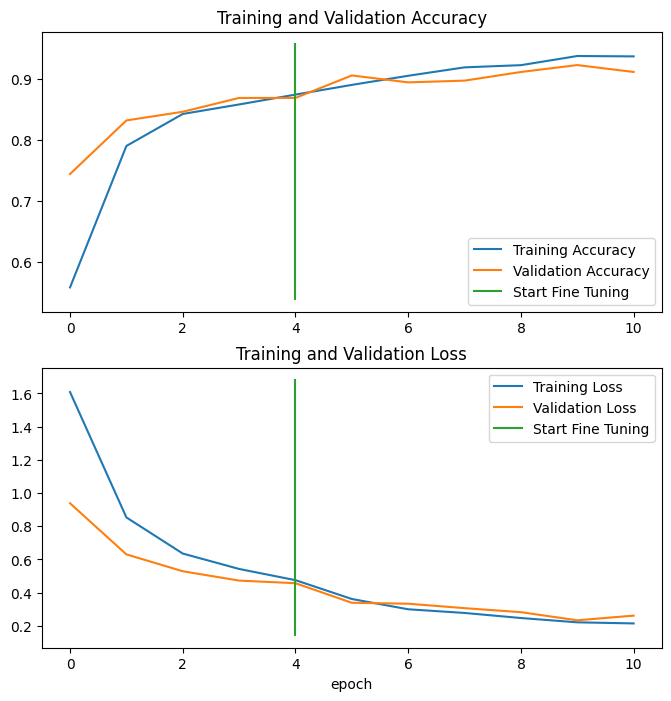

In [43]:
compare_historys(history_10_percent_data_aug, history_finetuned, initial_epochs=5)

# Saving the trained model

In [79]:
model_save_path = '/content/simple_model.h5'

In [80]:
model_3.save(model_save_path)

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [46]:
import os
print("File exists:", os.path.exists(model_save_path))

File exists: True


In [47]:
import h5py
try:
    with h5py.File(model_save_path, 'r') as f:
        print("File is a valid HDF5 file.")
except OSError as e:
    print("Error: File is not a valid HDF5 file.")

File is a valid HDF5 file.


In [48]:
pred_probs=model_3.predict(test_data,verbose=1)

45/45 [==============================] - 7s 100ms/step


In [49]:
len(pred_probs)

1439

In [50]:
pred_probs.shape

(1439, 15)

In [51]:
print(f"Number of prediction probabilities for sample 0: {len(pred_probs[0])}")
print(f"What prediction probability sample 0 looks like:\n {pred_probs[0]}")
print(f"The class with the highest predicted probability by the model for sample 0: {pred_probs[0].argmax()}")

Number of prediction probabilities for sample 0: 15
What prediction probability sample 0 looks like:
 [7.9315447e-07 3.9346131e-05 3.5907092e-08 1.1979691e-06 9.2718910e-05
 2.6013991e-05 2.5817494e-06 8.7458311e-06 7.2387321e-04 9.8443925e-05
 1.7147431e-05 9.1803238e-05 1.9431188e-03 9.9694830e-01 5.9618415e-06]
The class with the highest predicted probability by the model for sample 0: 13


In [52]:
pred_probs[:5]

array([[7.93154470e-07, 3.93461305e-05, 3.59070924e-08, 1.19796914e-06,
        9.27189103e-05, 2.60139914e-05, 2.58174941e-06, 8.74583111e-06,
        7.23873207e-04, 9.84439248e-05, 1.71474312e-05, 9.18032383e-05,
        1.94311875e-03, 9.96948302e-01, 5.96184145e-06],
       [2.26994956e-09, 9.96914884e-10, 1.05127122e-11, 7.19433091e-09,
        9.99985576e-01, 4.20509932e-10, 1.07482601e-09, 1.02350064e-11,
        4.39284342e-09, 8.62502176e-08, 8.57563395e-11, 1.79195879e-07,
        4.84790888e-11, 1.41239061e-05, 5.37113520e-10],
       [4.59870009e-08, 4.75517197e-07, 1.88760509e-08, 5.45375078e-05,
        9.99888020e-11, 8.64300898e-09, 1.32872047e-10, 1.63695518e-07,
        6.23864125e-08, 4.02845401e-08, 6.80655575e-12, 2.24079564e-08,
        2.73019142e-11, 2.28622156e-11, 9.99944568e-01],
       [4.18385549e-04, 6.43063162e-04, 1.87146696e-04, 3.38307098e-02,
        9.56672668e-01, 3.05874459e-03, 4.65972917e-05, 2.14901185e-04,
        6.66808555e-05, 3.50812217e-0

In [53]:
pred_classes = pred_probs.argmax(axis=1)
pred_classes[:10]

array([13,  4, 14,  4, 14,  3, 12,  1, 13,  1])

In [54]:
y_labels = []
for images, labels in test_data.unbatch():
  y_labels.append(labels.numpy().argmax())
y_labels[:10]

[4, 7, 13, 10, 8, 4, 10, 3, 2, 8]

In [55]:
len(y_labels)

1439

In [56]:
from sklearn.metrics import accuracy_score
sklearn_accuracy = accuracy_score(y_labels, pred_classes)
sklearn_accuracy

0.09381514940931203

In [57]:
class_names = test_data.class_names
class_names[:10]

['Biryani-resize',
 'Chole-Bhature-Resized',
 'Jalebi-Resize',
 'Kofta-Resized',
 'Naan-Resized',
 'Paneer-Tikka-resized',
 'Pani-Puri-resize',
 'Pav-Bhaji-Resized',
 'Vadapav-Resized',
 'dabeli-resize']

In [58]:
from sklearn.metrics import classification_report
print(classification_report(y_labels, pred_classes))

              precision    recall  f1-score   support

           0       0.04      0.04      0.04        69
           1       0.06      0.06      0.06        98
           2       0.10      0.10      0.10        92
           3       0.17      0.18      0.18       201
           4       0.06      0.06      0.06       106
           5       0.09      0.08      0.08        78
           6       0.11      0.11      0.11        54
           7       0.05      0.04      0.05        91
           8       0.16      0.17      0.17       161
           9       0.00      0.00      0.00        66
          10       0.04      0.04      0.04        79
          11       0.08      0.08      0.08        75
          12       0.02      0.02      0.02        52
          13       0.11      0.11      0.11       103
          14       0.08      0.08      0.08       114

    accuracy                           0.09      1439
   macro avg       0.08      0.08      0.08      1439
weighted avg       0.09   

In [59]:
def load_and_prep_image(filename, img_shape=224, scale=True):

  img = tf.io.read_file(filename)
  img = tf.io.decode_image(img)
  img = tf.image.resize(img, [img_shape, img_shape])
  if scale:
    return img/255.
  else:
    return img

1/1 [==============================] - 0s 91ms/step


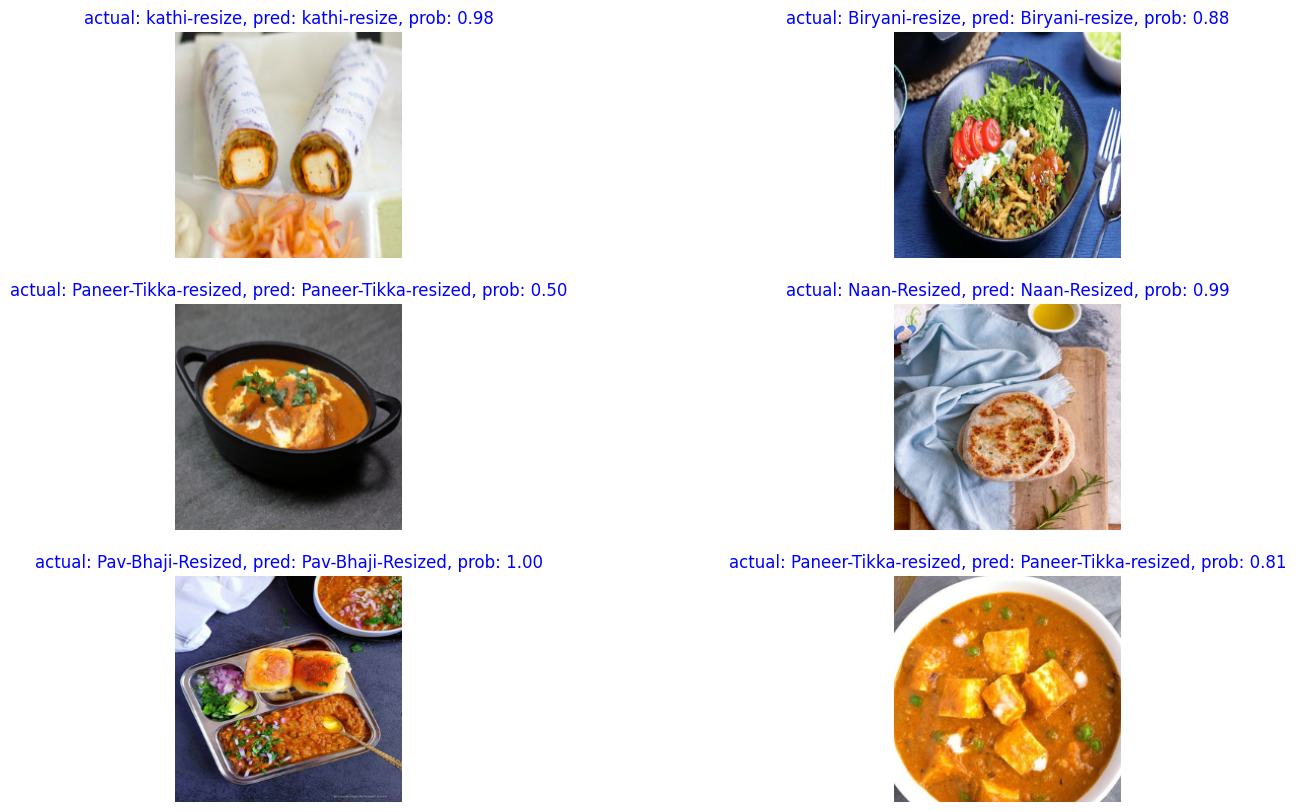

In [62]:
import os
import random

plt.figure(figsize=(17, 10))
for i in range(6):
  class_name = random.choice(class_names)
  filename = random.choice(os.listdir(test_dir + "/" + class_name))
  filepath = test_dir +"/"+ class_name + "/" + filename

  img = load_and_prep_image(filepath, scale=False)
  pred_prob = model_3.predict(tf.expand_dims(img, axis=0))
  pred_class = class_names[pred_prob.argmax()]

  # Plot the images
  plt.subplot(3, 2, i+1)
  plt.imshow(img/255.)
  if class_name == pred_class:
    title_color = "b"
  else:
    title_color = "r"
  plt.title(f"actual: {class_name}, pred: {pred_class}, prob: {pred_prob.max():.2f}", c=title_color)
  plt.axis(False);

In [63]:
def predict_image(model,img):
  img = load_and_prep_image(img, scale=False)
  pred_prob = model.predict(tf.expand_dims(img, axis=0))
  pred_class = class_names[pred_prob.argmax()]

  # Plot the image with appropriate annotations
  plt.figure()
  plt.imshow(img/255.)
  plt.title(f"pred: {pred_class}, prob: {pred_prob.max():.2f}")
  plt.axis(False)

In [64]:
!wget "https://shwetainthekitchen.com/wp-content/uploads/2021/12/Dal-Fry-Recipe.jpg"

--2024-07-11 19:28:50--  https://shwetainthekitchen.com/wp-content/uploads/2021/12/Dal-Fry-Recipe.jpg
Resolving shwetainthekitchen.com (shwetainthekitchen.com)... 104.18.4.29, 104.18.5.29, 2606:4700::6812:51d, ...
Connecting to shwetainthekitchen.com (shwetainthekitchen.com)|104.18.4.29|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 129745 (127K) [image/jpeg]
Saving to: ‘Dal-Fry-Recipe.jpg’

Dal-Fry-Recipe.jpg  100%[===================>] 126.70K  --.-KB/s    in 0.008s  

2024-07-11 19:28:51 (14.9 MB/s) - ‘Dal-Fry-Recipe.jpg’ saved [129745/129745]



1/1 [==============================] - 0s 27ms/step


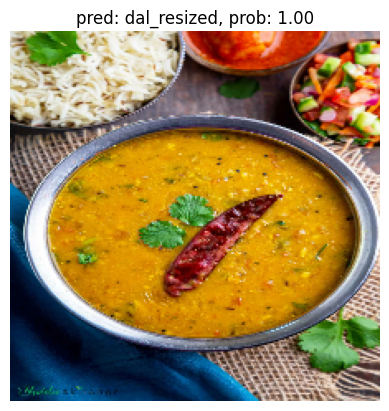

In [65]:
predict_image(model_3,'Dal-Fry-Recipe.jpg')

In [66]:
!wget "https://vismaifood.com/storage/app/uploads/public/9a3/26d/362/thumb__700_0_0_0_auto.jpg"

--2024-07-11 19:29:01--  https://vismaifood.com/storage/app/uploads/public/9a3/26d/362/thumb__700_0_0_0_auto.jpg
Resolving vismaifood.com (vismaifood.com)... 184.168.97.101
Connecting to vismaifood.com (vismaifood.com)|184.168.97.101|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 280180 (274K) [image/jpeg]
Saving to: ‘thumb__700_0_0_0_auto.jpg’

thumb__700_0_0_0_au 100%[===================>] 273.61K   392KB/s    in 0.7s    

2024-07-11 19:29:03 (392 KB/s) - ‘thumb__700_0_0_0_auto.jpg’ saved [280180/280180]



1/1 [==============================] - 0s 26ms/step


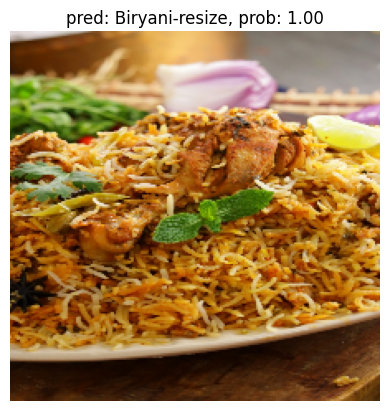

In [67]:
predict_image(model_3,'thumb__700_0_0_0_auto.jpg')

In [68]:
!wget "https://www.archanaskitchen.com/images/archanaskitchen/1-Author/sneha-archanaskitchen.com/Sweet__Spicy_Pineapple_Pani_Puri_Recipe_.jpg"

--2024-07-11 19:29:08--  https://www.archanaskitchen.com/images/archanaskitchen/1-Author/sneha-archanaskitchen.com/Sweet__Spicy_Pineapple_Pani_Puri_Recipe_.jpg
Resolving www.archanaskitchen.com (www.archanaskitchen.com)... 35.190.62.91
Connecting to www.archanaskitchen.com (www.archanaskitchen.com)|35.190.62.91|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 180233 (176K) [image/jpeg]
Saving to: ‘Sweet__Spicy_Pineapple_Pani_Puri_Recipe_.jpg’

Sweet__Spicy_Pineap 100%[===================>] 176.01K   128KB/s    in 1.4s    

2024-07-11 19:29:10 (128 KB/s) - ‘Sweet__Spicy_Pineapple_Pani_Puri_Recipe_.jpg’ saved [180233/180233]



1/1 [==============================] - 0s 39ms/step


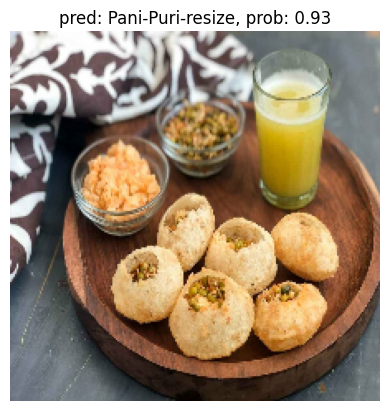

In [69]:
predict_image(model_3,'Sweet__Spicy_Pineapple_Pani_Puri_Recipe_.jpg')

In [81]:
import tensorflow as tf
model_save_path = '/content/simple_model.h5'
new_model = tf.keras.models.load_model(model_save_path)

In [82]:
import h5py
try:
    with h5py.File(model_save_path, 'r') as f:
        print("File is a valid HDF5 file.")
except OSError as e:
    print("Error: File is not a valid HDF5 file.")


File is a valid HDF5 file.


# Image Classification Web App with Streamlit

Next comming cells  demonstrates how to create a web application for image classification using Streamlit and TensorFlow. The application allows users to upload an image, preprocess it, and get predictions from a pre-trained model. The notebook also uses ngrok to create a public URL for the Streamlit app.

## Step-by-Step Guide

1. **Load and Preprocess the Image**: The `img_classification.py` script contains functions to load and preprocess images to be compatible with our model.
2. **Build the Streamlit App**: The `app.py` script sets up the Streamlit interface for users to upload images and view predictions.
3. **Expose the App to the Internet**: The ngrok service is used to make the Streamlit app publicly accessible.

Let's dive into the code!

---

### Step 1: Image Preprocessing
We start by defining a function to load and preprocess the image.


In [83]:
import tensorflow as tf
import tensorflow.keras
from PIL import Image, ImageOps
import numpy as np

# Create a function to import an image and resize it to be able to be used with our model
def load_and_prep_image(filename, img_shape=224, scale=True):
  img = tf.convert_to_tensor(filename,dtype=tf.float32)
  img = tf.image.resize(img, [img_shape, img_shape])

  # Scale the image pixel values to the range (0, 1) if scale is True
  if scale:
    return img/255.
  else:
    return img

class_names = [
    'Biryani', 'Chole-Bhature', 'Jalebi', 'Kofta', 'Naan',
    'Paneer-Tikka', 'Pani-Puri', 'Pav-Bhaji', 'Vadapav',
    'Dabeli', 'Dal', 'Dhokla', 'Dosa', 'Kathi', 'Pakora'
]

def predict_data(model, filename, class_names):
  img = load_and_prep_image(filename)
  pred_prob = model.predict(tf.expand_dims(img, axis=0)) # make prediction on image with shape [None, 224, 224, 3]

  pred_class = class_names[pred_prob.argmax()]
  return pred_class

### Step 2: Build the Streamlit App

Next, we set up our Streamlit application. This app will allow users to upload an image and receive a prediction from the pre-trained model.

In [84]:
%%writefile app.py
import tensorflow.keras
from PIL import Image, ImageOps
import numpy as np
import streamlit as st
from img_classification import load_and_prep_image,predict_data
# Load pre-trained model
model_1 = tf.keras.models.load_model('/content/simple_model.h5')

st.title("Your Streamlit App for Machine Learning Predictions")
st.write("Upload an image and get the predicted class.")

# Define class names
class_names = ['Biryani', 'Chole-Bhature', 'Jalebi', 'Kofta', 'Naan', 'Paneer-Tikka', 'Pani-Puri', 'Pav-Bhaji', 'Vadapav', 'Dabeli', 'Dal', 'Dhokla', 'Dosa', 'Kathi', 'Pakora']

# File uploader for user to upload an image
uploaded_file = st.file_uploader("Choose an image...", type=["jpg", "jpeg", "png"])

if uploaded_file is not None:
    try:
      # Load and preprocess the image
      data = Image.open(uploaded_file)
      st.image(data, caption='Uploaded pic.', use_column_width=True)

      st.write("")
      st.write("Classifying...")

      img=load_and_prep_image(data)
      predicted_class = predict_data(model_1, img, class_name)

      # Display results
      st.success("Prediction successful!")
      st.write(f"Predicted Class: {predicted_class}")

    except Exception as e:
       st.error(f"An error occurred during prediction: {e}")

Overwriting app.py


### Step 3: Install Required Packages

Before we start building our image classification web app, we need to install a few necessary packages. The `streamlit` package will allow us to create the web interface, and the `pyngrok` package will help us expose our Streamlit app to the internet.

Run the following commands to install these packages:


In [85]:
# Install Streamlit, a framework to create web apps with minimal effort
!pip -q install streamlit

# Install pyngrok, a package to create public URLs for our web app
!pip -q install pyngrok

In [88]:
from pyngrok import ngrok

# Replace 'your_authtoken_here' with the actual authtoken from your ngrok dashboard
ngrok.set_auth_token('2j6NKi85ObFwq0D7gY4IRFoJ4nr_7g4hGEZGLPf5DkcLURCrU')

# Connect to ngrok on port 80
public_url = ngrok.connect(80)
print('Link to web app:')
print(public_url)

# Run your Streamlit app
!streamlit run --server.port 80 app.py >/dev/null

Link to web app:
NgrokTunnel: "https://981b-34-32-200-64.ngrok-free.app" -> "http://localhost:80"
2024-07-11 19:57:50.863315: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-11 19:57:50.863358: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-11 19:57:50.864770: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-07-11 19:57:51.941377: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2024-07-11 19:57:53.592261: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:47] Overriding orig_value setting because the TF_FORCE_GP